# Evaluation Project - 3
Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# Importing necessary libraries

In [209]:
# Importing Required Libraries

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [210]:
# Reading the csv file from dataset
df = pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1               1  20-12-2015          1.35      54876.98   674.28   44638.81   
2               2  13-12-2015          0.93     118220.22   794.70  109149.67   
3               3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4               4  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  04-02-2018          1.63      17074.83  2046.96    1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70    3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92    2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63    2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

The dataset has been defined to the variable df. We have 18249 rows and 14 columns.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the price prediction of avocado, so I am dropping this column.

Now as per our given problem statement we see that Average Price is the column which needs to be predicted making it our label. Since the data present in our label is in continous format this turns out to be a Regression problem.

Also the feature columns that we have are not all in numerical format and while building our machine learning model object datatypes are not acceptable.

In [211]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

Here I have dropped the column Unnamed:0.

In [212]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

Showing first five rows of the dataset.

# Exploratory Data Analysis (EDA)

In [213]:
# Checking the dimension of the dataset
df.shape

(18249, 13)

There are 18249 rows and 13 columns are there in the dataset. Out of 13, 12 are different features and remaining one is the label "Average Price".

In [214]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in the dataset contains three different types of data namely float, integer and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

# Feature engineering

In [215]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [216]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see the Date column has datetime data type. Now let's split this data into months and day.

In [217]:
df["Month"] = df["Date"].dt.month

In [218]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [219]:
df.drop("Date",axis=1,inplace=True)

In [220]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany      6   12  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

We have extracted amaonth and Day from Date column and dropped Date column since it was of no use. Abive is the dataframe after feature engineering.

In [221]:
# Again check the shape of the dataset
df.shape

(18249, 14)

There are 18249 rows and 14 columns. Here we have added two more columns from date.

In [222]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [223]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the number of unique values present in each columns.

In [224]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

It is clear that there are no null values present in the dataset.

<AxesSubplot:>

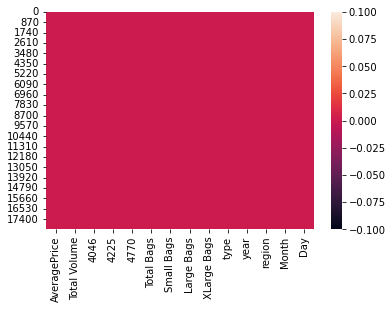

In [225]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

By visualizing also we can say there are no missing values. So our data is cleaned. Let's move further.

In [226]:
# Checking how many columns are there in the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

These are the columns name present in the given dataset.

In [227]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the unique values present in the target variable.

In [229]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [230]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

This gives the list of values in the target variable which has int64 data type.

In [231]:
# Checking wheather the dataset contains any space
df.loc[df['AveragePrice']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

So from the above observation we can say there are no spaces present in the dataset.

# Description of Dataset

In [232]:
# Statistical summary of dataset
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.372842     15.466984  
std        3.525034      8.984552  
min        1.000000      1.000000  
25%        3.000000      7.000000  
50%        6.000000     16.000000  
75%       10.000000     23.000000  
max       12.000000     31.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no null values present in the daaset.

The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.

Before visualizing the data let's separate the categorical and numerical columns.

In [233]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


These are the categorical columns that we have, will encode these columns using either label encoder or one hot encoder.

In [234]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


These are the numerical columns present in the dataset.

# Data Visualization

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


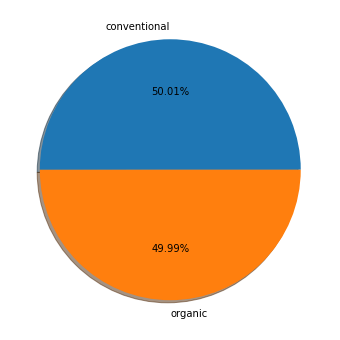

In [235]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


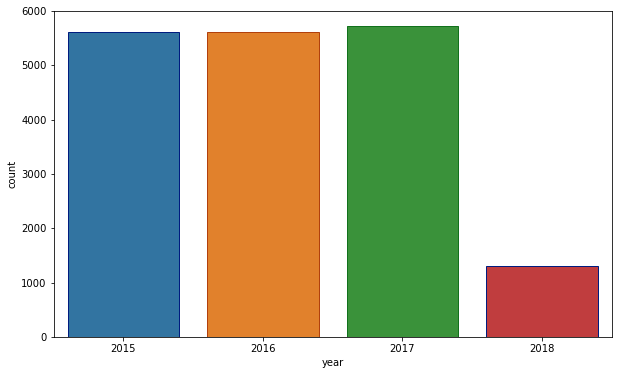

In [236]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year

1     1836
3     1728
11    1620
8     1620
5     1620
12    1512
10    1512
4     1512
2     1404
7     1404
6     1293
9     1188
Name: Month, dtype: int64


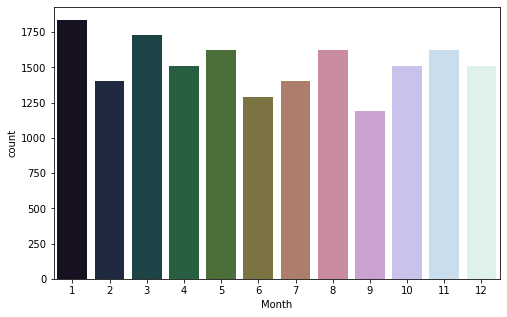

In [237]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, palette="cubehelix")
plt.show()

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

1     756
2     756
3     756
25    755
18    755
22    648
15    648
4     648
10    648
17    648
24    648
26    648
19    648
7     648
5     540
28    540
6     540
14    540
21    540
27    540
20    540
9     540
11    540
29    540
13    540
12    539
16    432
23    432
31    432
30    432
8     432
Name: Day, dtype: int64


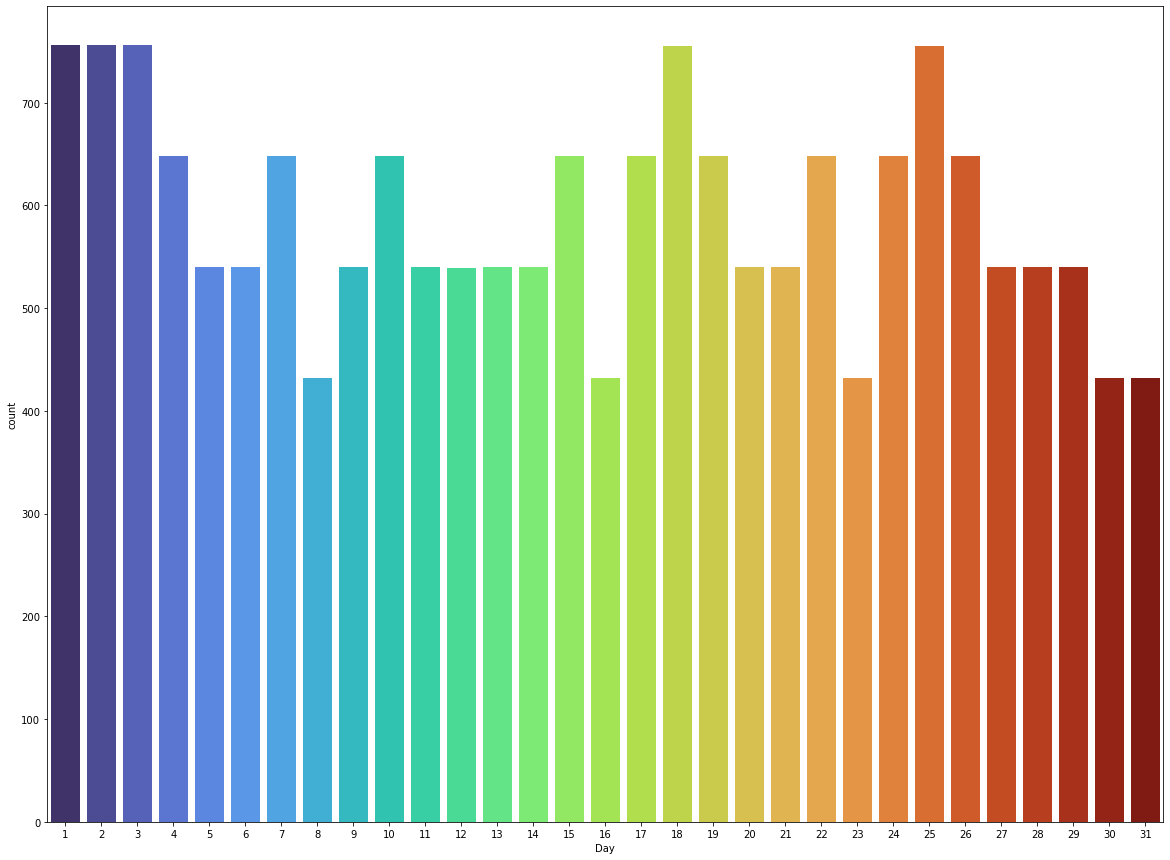

In [238]:
print(df['Day'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Day', data=df, palette="turbo")
plt.show()

In the "Date" column we can see multiple date with highest and lowest datapoint concentration. Like in the highest values we have dates 11 and 4 while for lowest values we have dates 30, 16, 9, 23, 2 and 31.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

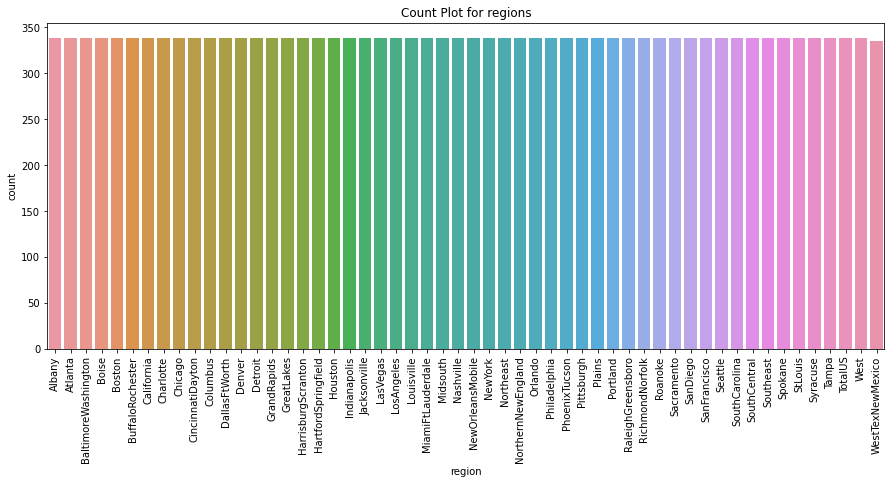

In [239]:
#Visualize the count of year
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

Let's plot the distribution plot to know how the data has been distributed in all the columns.

# Distribution of skewness

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


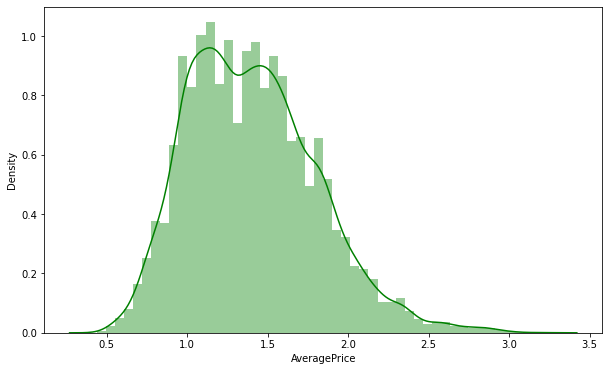

In [240]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

Here we can infer that the data is normally distributed in the label. Also the price of the avocado is more between 1.15 - 1.5.

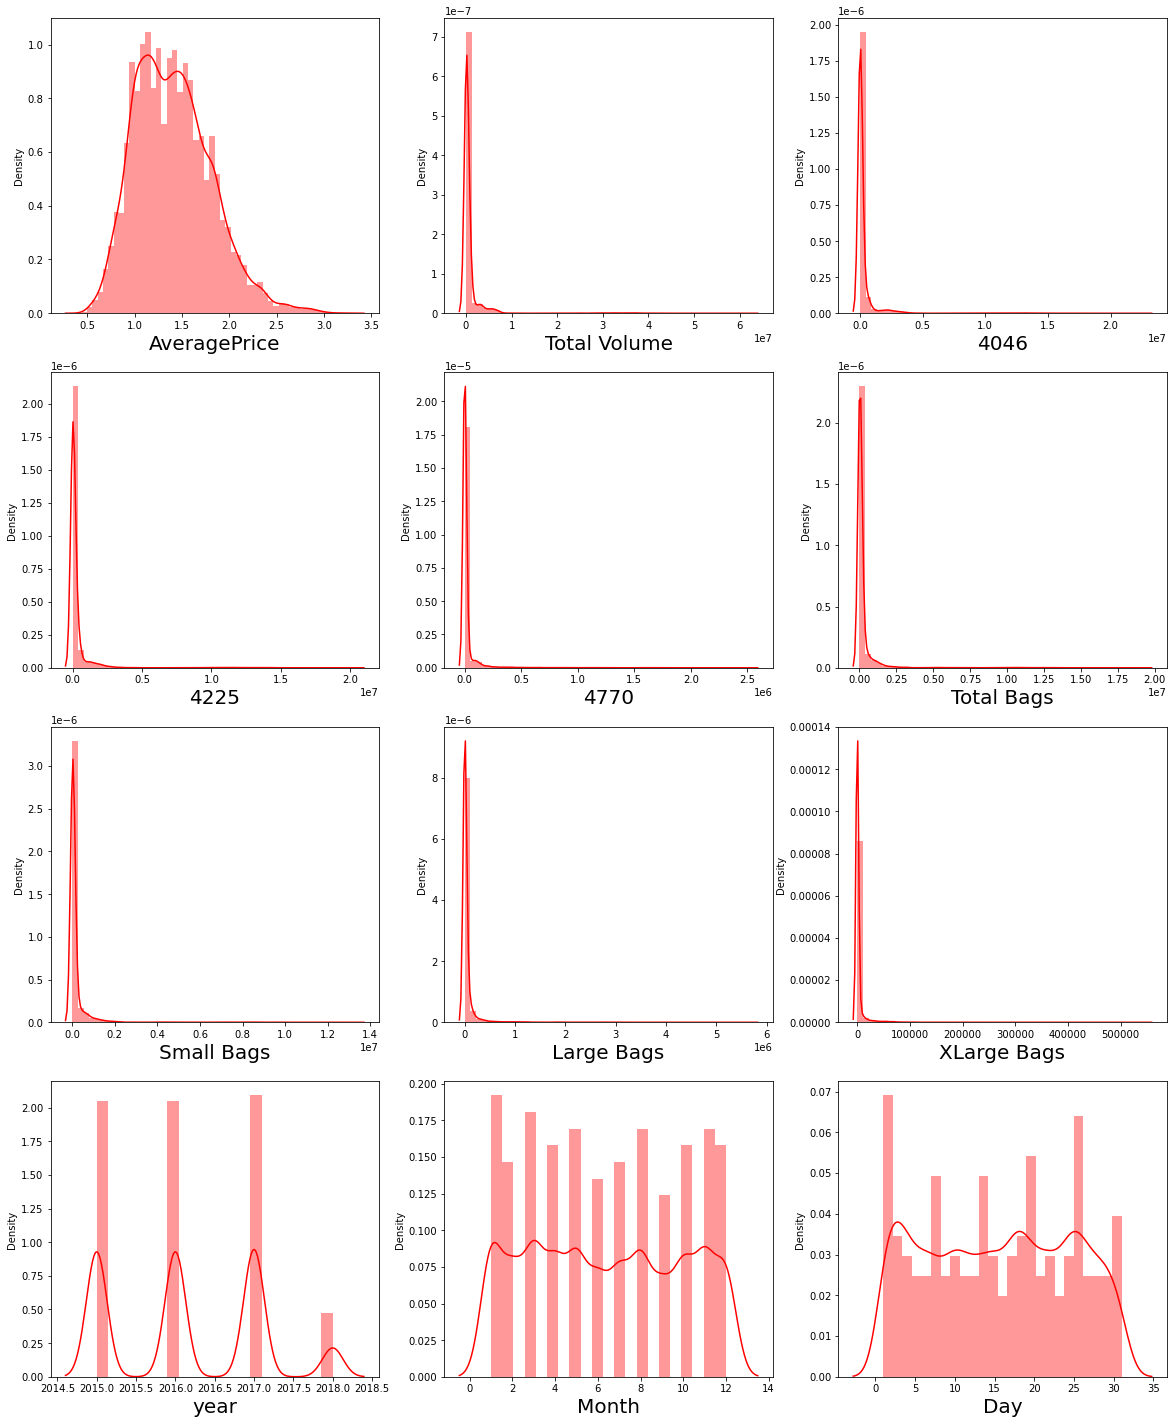

In [241]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns. So will remove these skewness later

# Bivariate Analysis

Text(0, 0.5, 'AveragePrice')

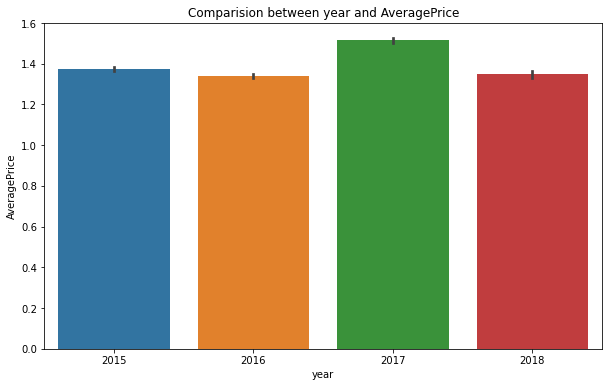

In [242]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.

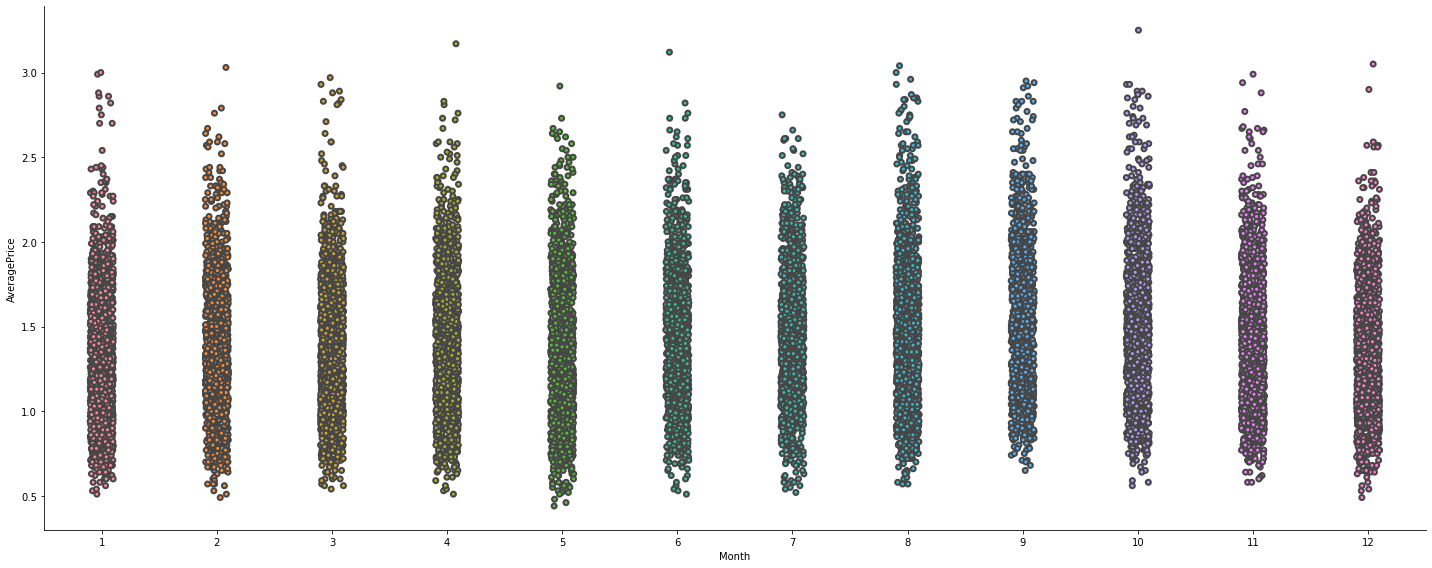

In [244]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

Looking at the plot we can observe the Average Price remains high during August(8th month), September(9th month) and October and starts to drop from November onwards. Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

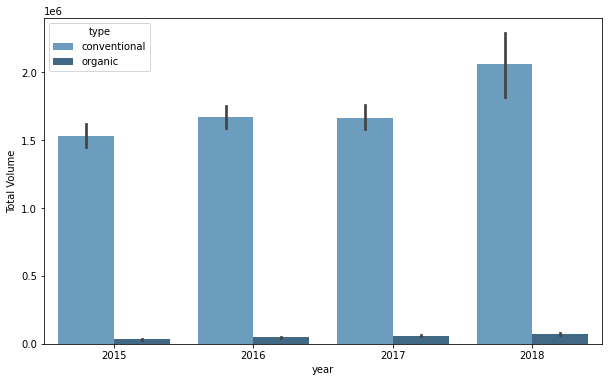

In [245]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.

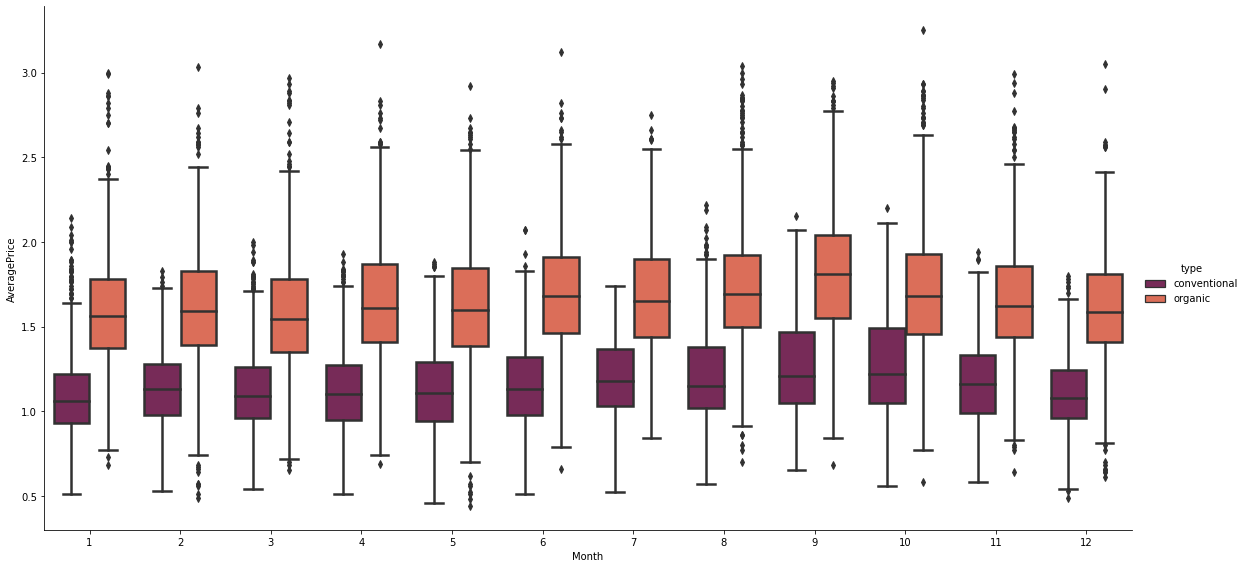

In [246]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

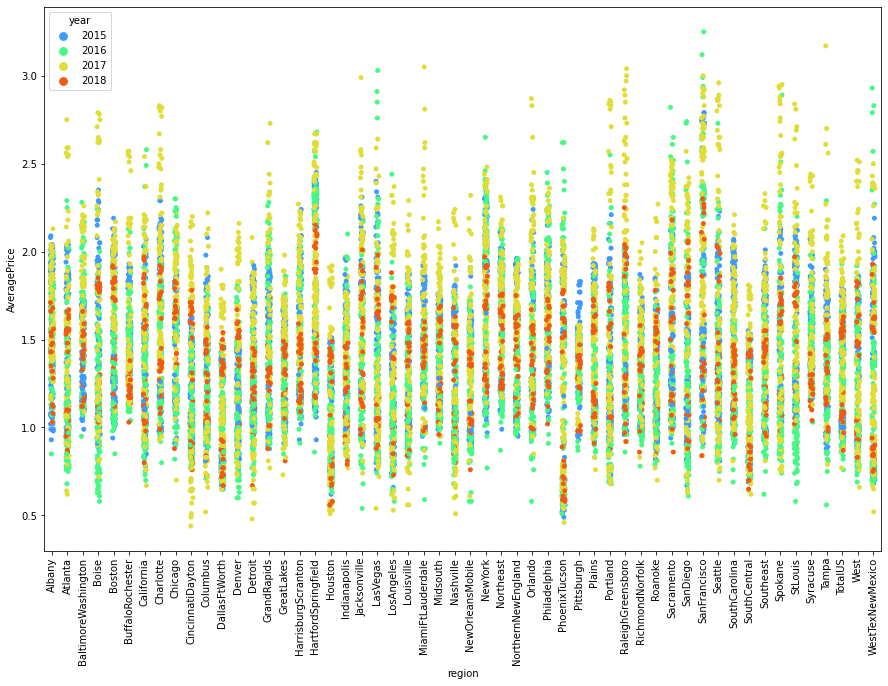

In [247]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="year", data=df, palette="turbo")
plt.xticks(rotation=90)
plt.show()

In the above strip plot we see the Average Price of avacodos over all the regions in all 4 years. We can see that in years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018.

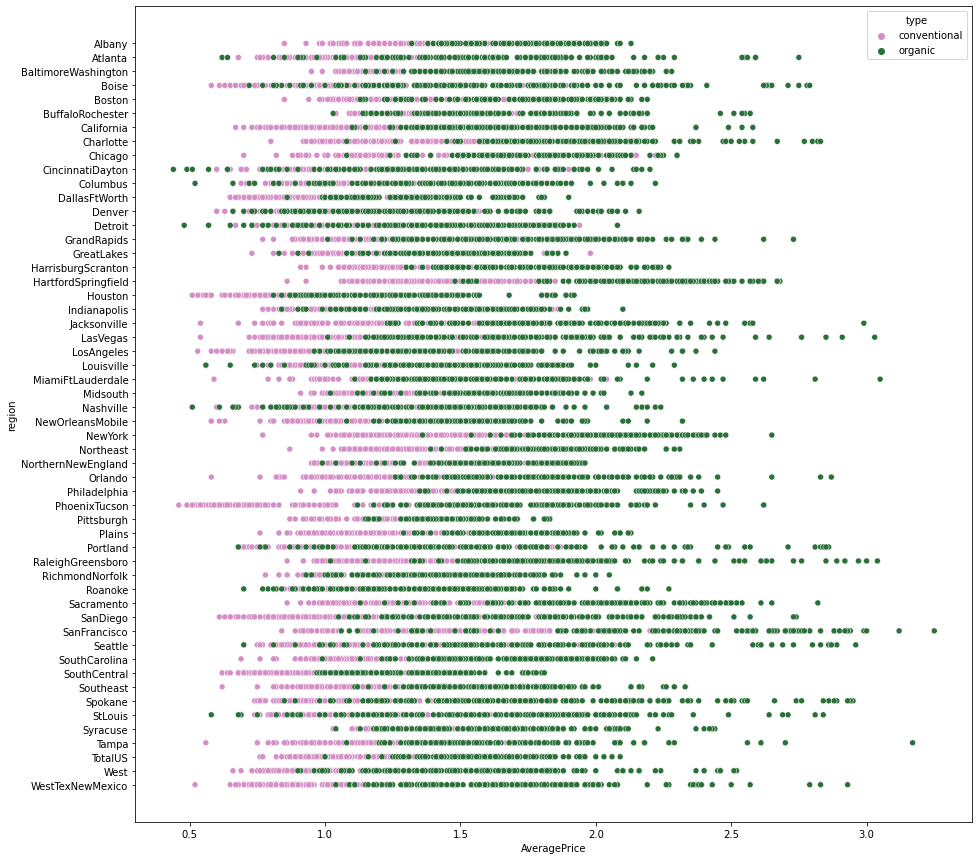

In [248]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()

In the above scatter plot that holds data between Region vs Average Price we can see clearly how organic avacados are priced way higher than it's conventional counterparts in each and every region.

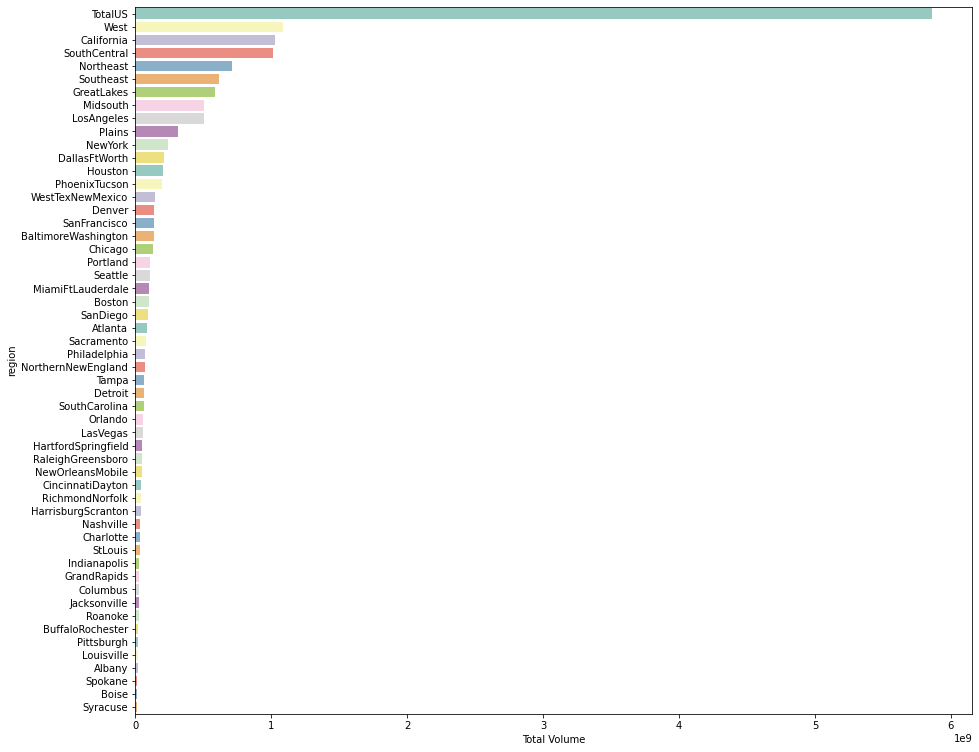

In [249]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set3")
plt.show()

In the above bar plot we can see a sorted number of Total Volume of avacados sold from each and every region. Therefore when compared to the Total US area per region values are lesser but we can see that major contributors in region are West, California, South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York and so forth.

<Figure size 1080x720 with 0 Axes>

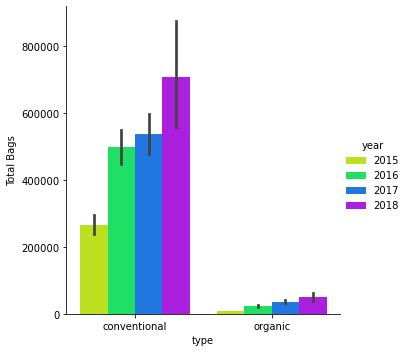

In [250]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="hsv")
plt.show()

In the above bar plot we see that since the Total Volume was always high for conventional types being sold therefore the usage of bags was higher for conventional types over the organic ones. Therefore we see that Total Bags is high and specially highest in 2018 for conventional avacados just like the Total Volume that was sold being directly proportional with each other.

<Figure size 1080x720 with 0 Axes>

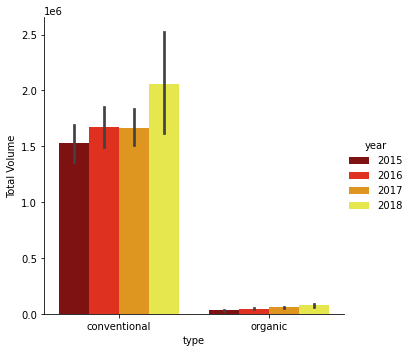

In [251]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df, palette="hot")
plt.show()

In the above bar plot we see that the Total Volume for conventional type were high in all 4 years when compared to it's organic counterparts.

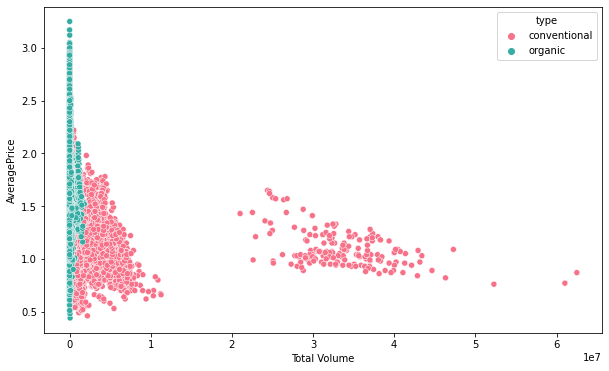

In [252]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

The scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. So the Average Price of the oraganic type with zero volume is more than the conventional type.

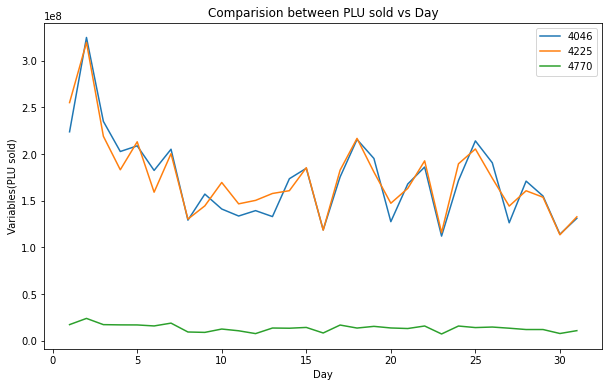

In [253]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4046 was sold in all the day and the avocados with PLU 4225 and PLU 4770 was sold all time high.

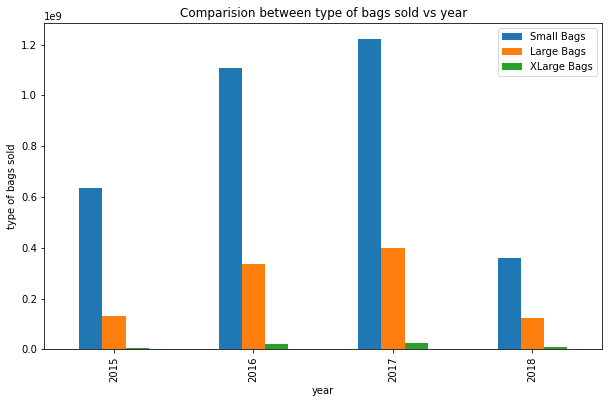

In [254]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

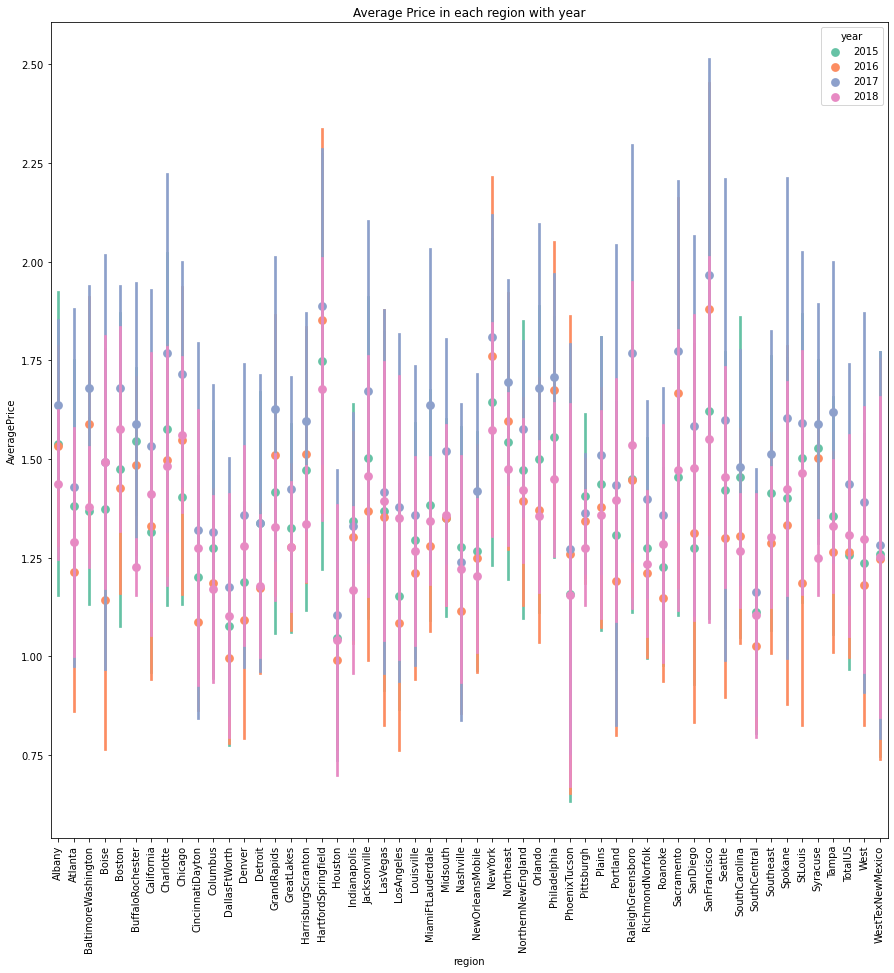

In [255]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

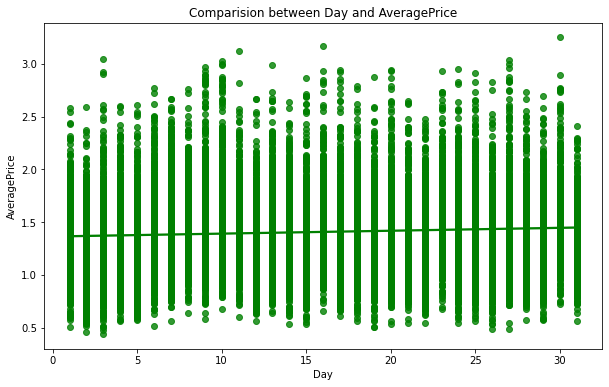

In [256]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.regplot(df['Day'],df['AveragePrice'],color="g");
plt.show()

The average price of the avocado is high in almost all the days and less in 7th, 14th and 22nd day of the month.

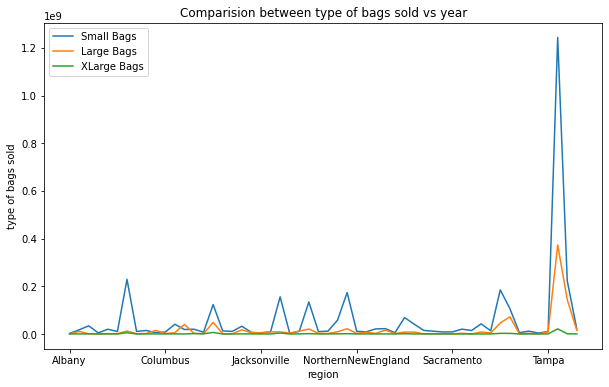

In [257]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.

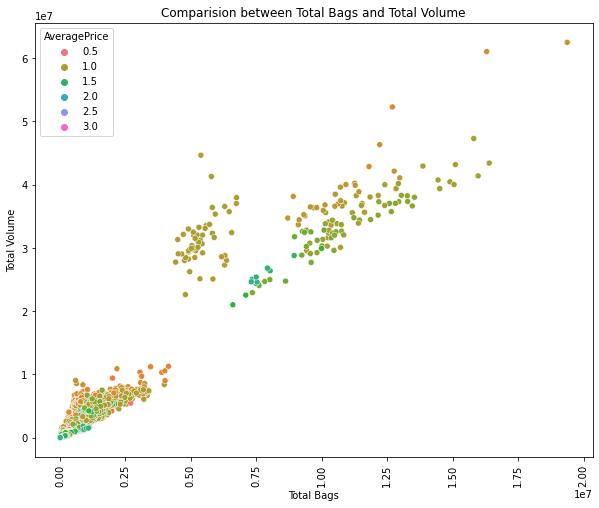

In [258]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

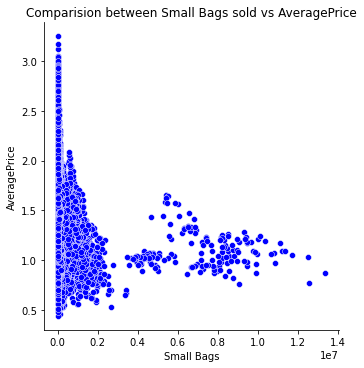

In [259]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

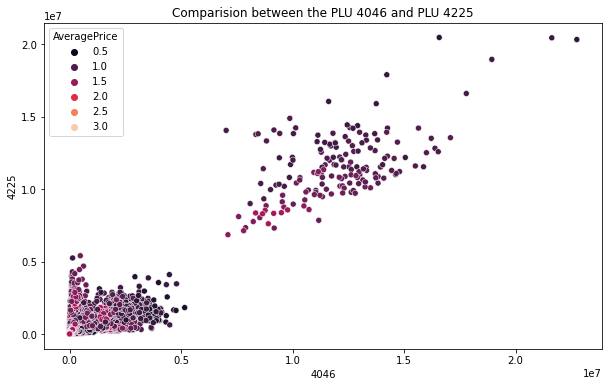

In [260]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph. These scatter plots can also be observed in the pairplot.

I have tried almost all the plotting techniques to get the best pattern, thinking that above plots are good to compare the relationship between the columns. To know more about the relationship between the features I will plot pairplot which is also a kind of scatterplot.

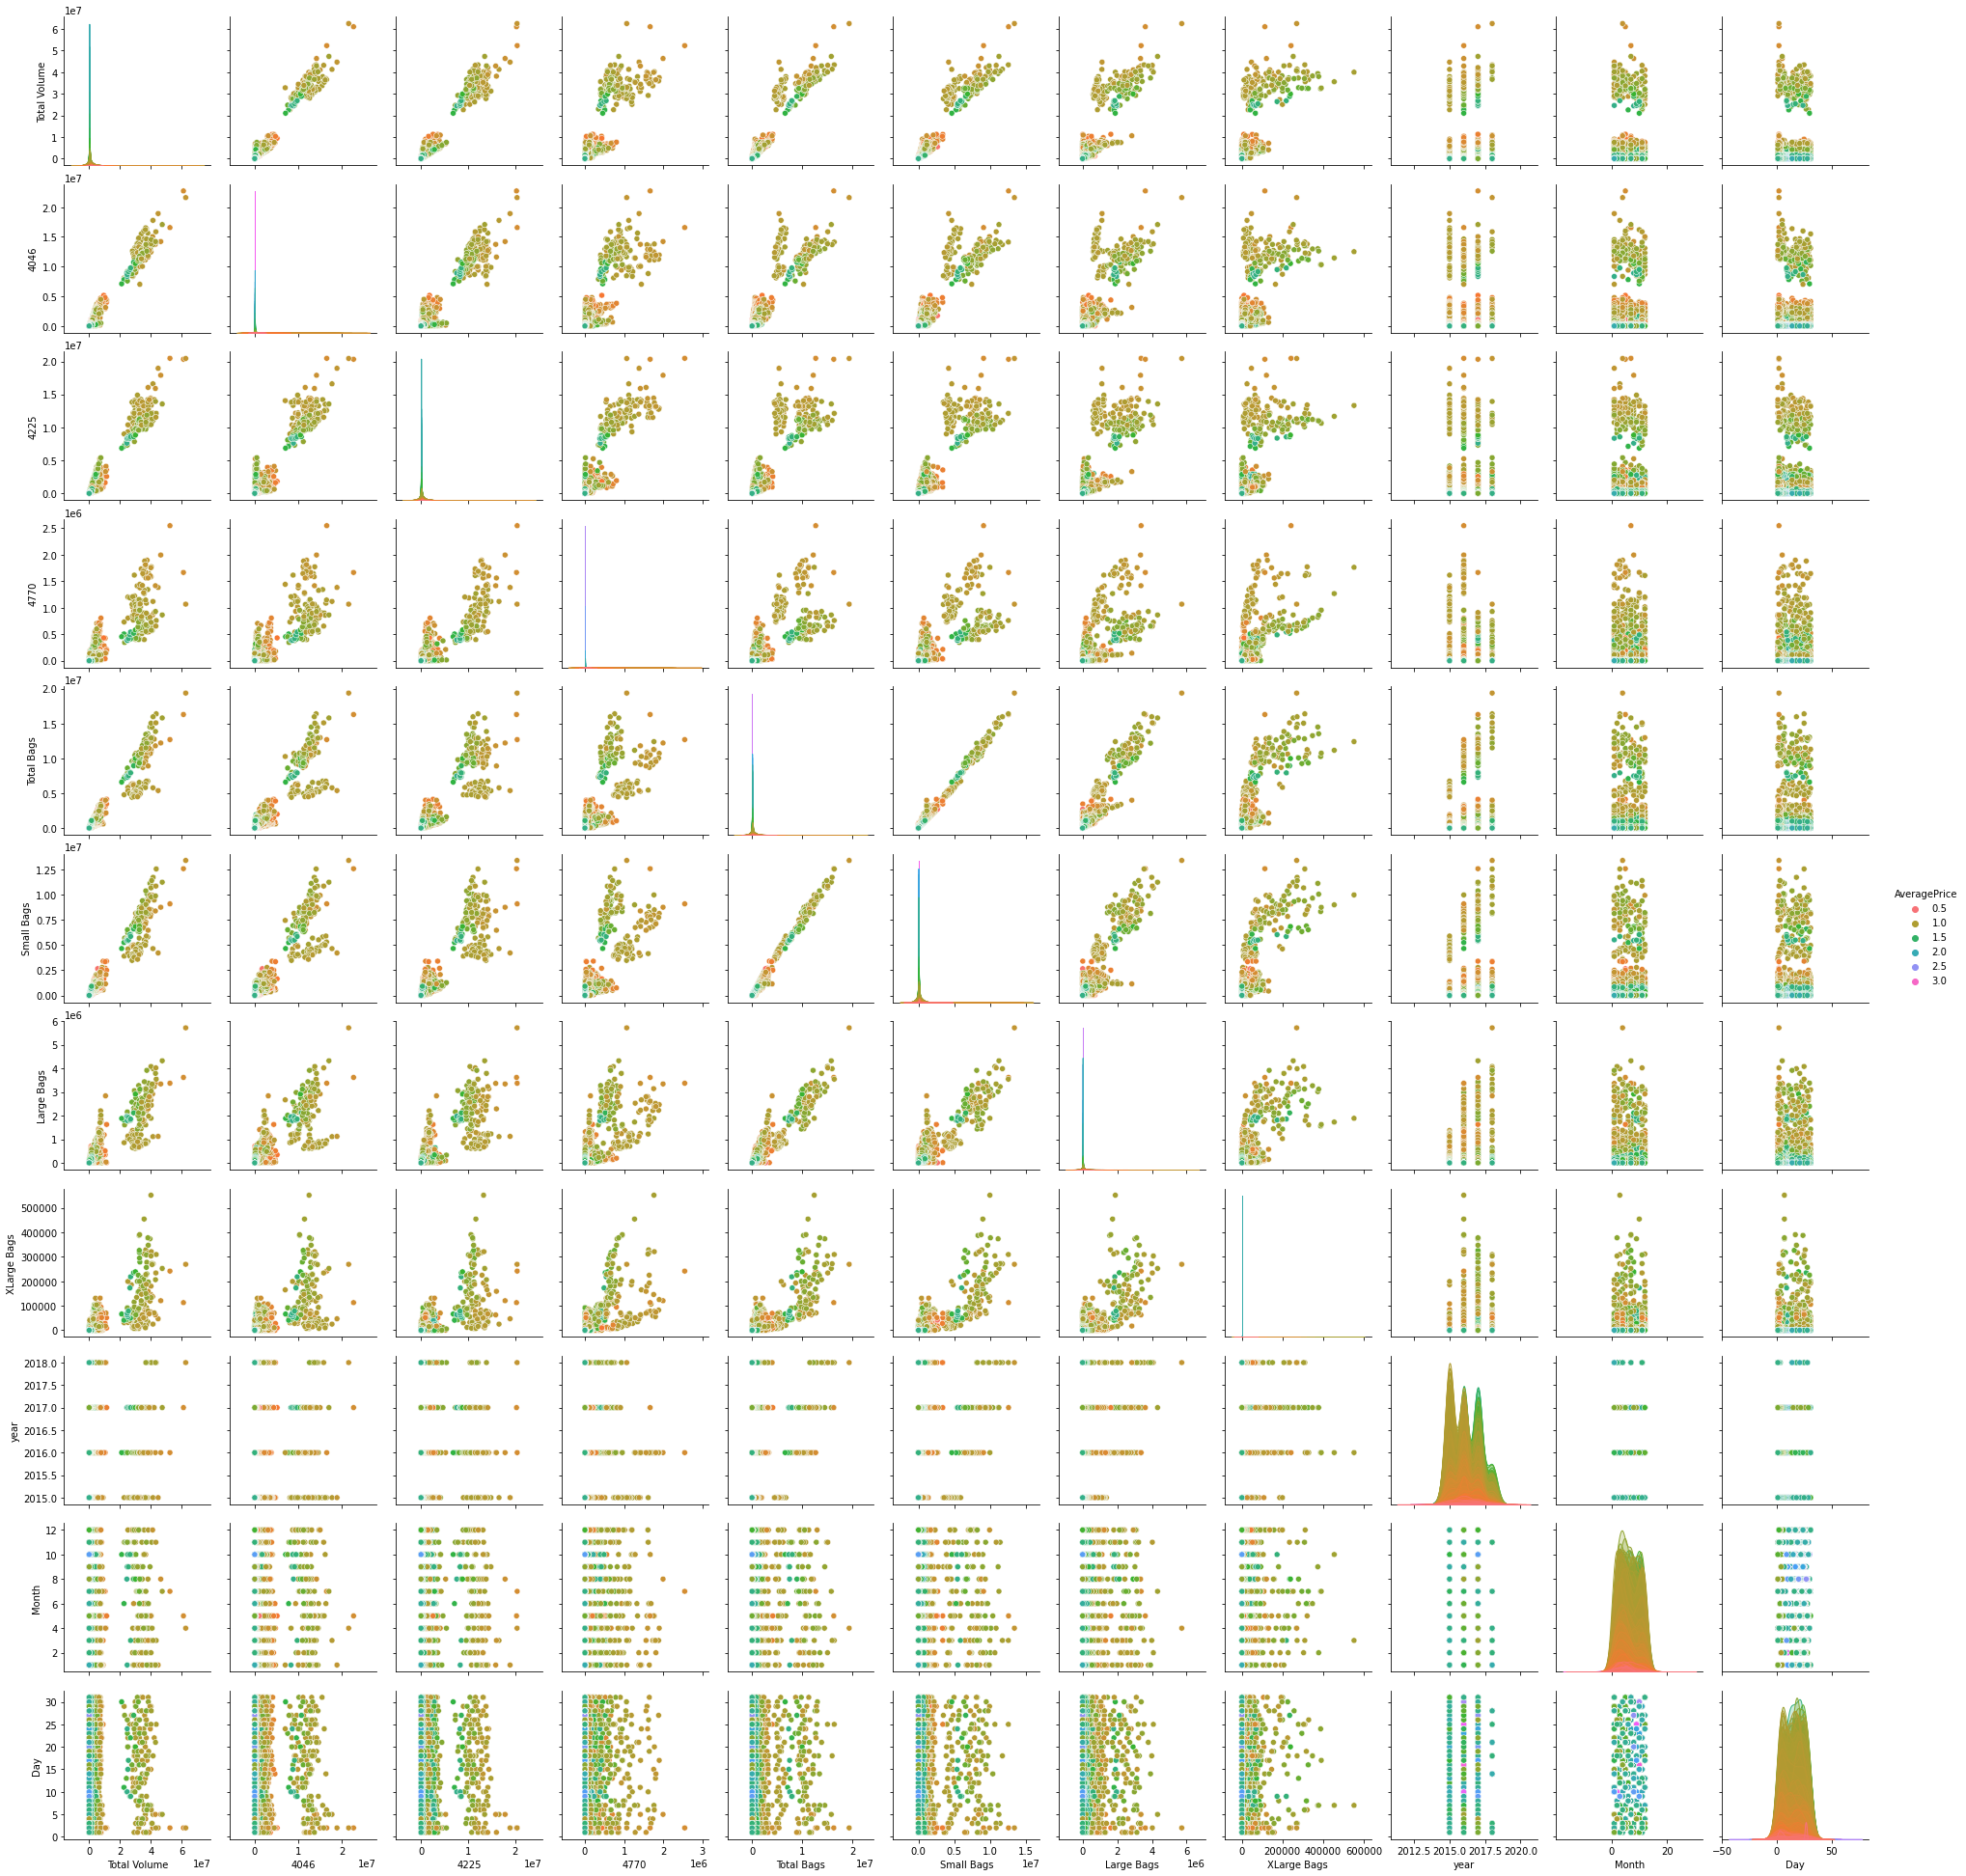

In [261]:
sns.pairplot(df,hue="AveragePrice",palette="husl")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

Here we can infer that linear relationship exists in most of the columns and others have no much relationship with each other.

We can also notice the correlation between the features and some columns have outliers which we will remove using appropriate methods.

Day column is highly correlated with all the other features.

# Checking Correlation:

In [263]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Month             0.075134     -0.015344 -0.014522 -0.015892 -0.024220   
Day               0.061157     -0.013212 -0.014375 -0.014567 -0.012446   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193   
4046            0.920057    0.925280    0.838645     0.699377  0.003353   
4225            0.905787    0.916031    0.810015     0.688809 -0.009559   
4770            0.792314    0.802733    0.698471     0.679861 -0.036531   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033   
year            0.071552    0.063915    0.087891     0.081033  1.000000   
Month          -0.013061   -0.012432   -0.014330    -0.006182 -0.098812   
Day            -0.008687   -0.007999   -0.010477    -0.002364 -0.026504   

                 Month       Day  
AveragePrice  0.075134  0.061157  
Total Volume -0.015344 -0.013212  
4046         -0.014522 -0.014375  
4225         -0.015892 -0.014567  
4770         -0.024220 -0.012446  
Total Bags   -0.013061 -0.008687  
Small Bags   -0.012432 -0.007999  
Large Bags   -0.014330 -0.010477  
XLarge Bags  -0.006182 -0.002364  
year         -0.098812 -0.026504  
Month         1.000000 -0.046984  
Day          -0.046984  1.000000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'year'),
  Text(0, 10.5, 'Month'),
  Text(0, 11.5, 'Day')])

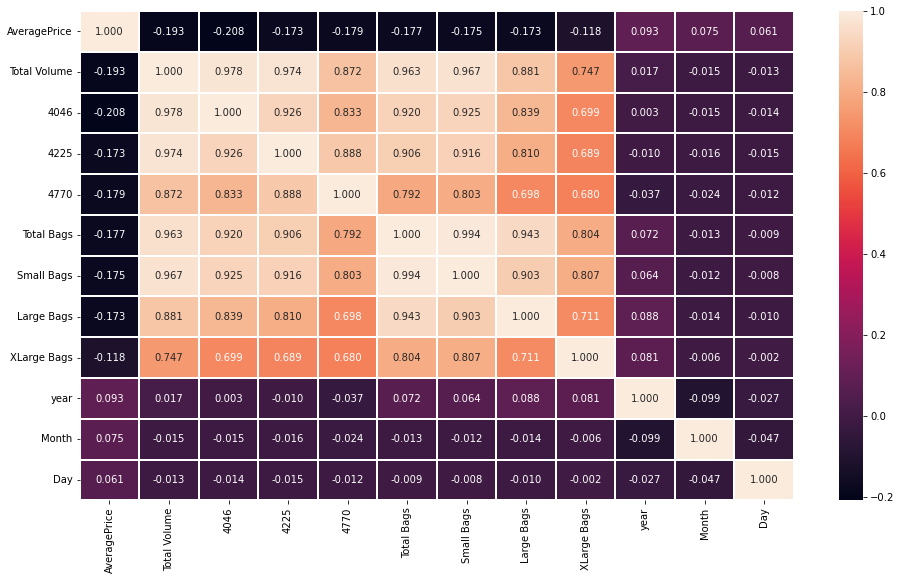

In [264]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [265]:
df.corr().AveragePrice.sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
Day             0.061157
Month           0.075134
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.
The features Day have no relation with the target so we can drop the Day column. 
Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF method.

# Visualizing the correlation between label and features using bar plot

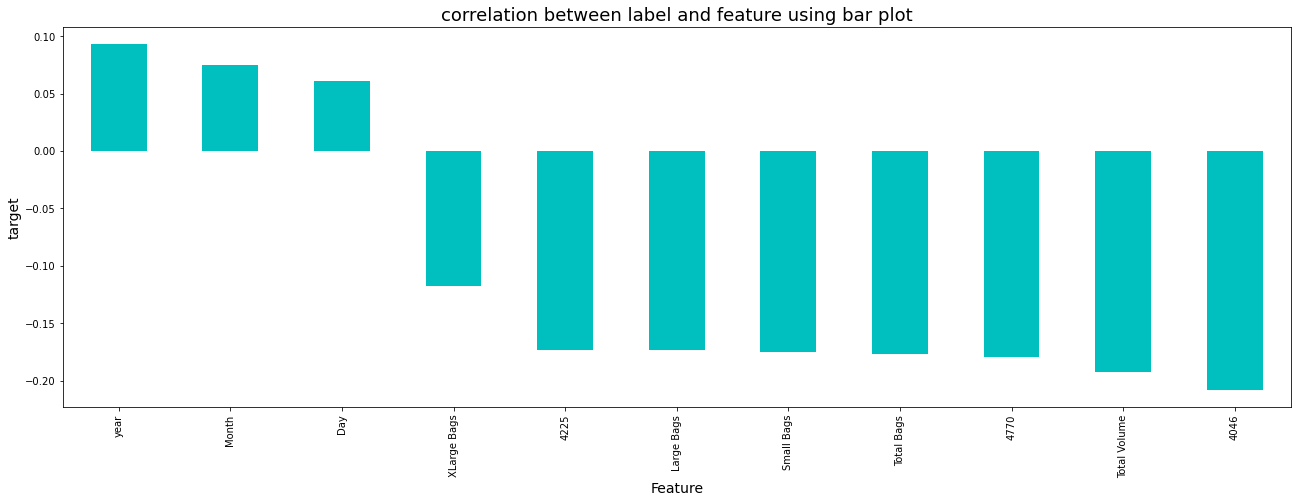

In [266]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Since Day has very less correlation with the target variable we will remove the Day column during Data Preprocessing stage.

# Checking for skewness

In [267]:
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

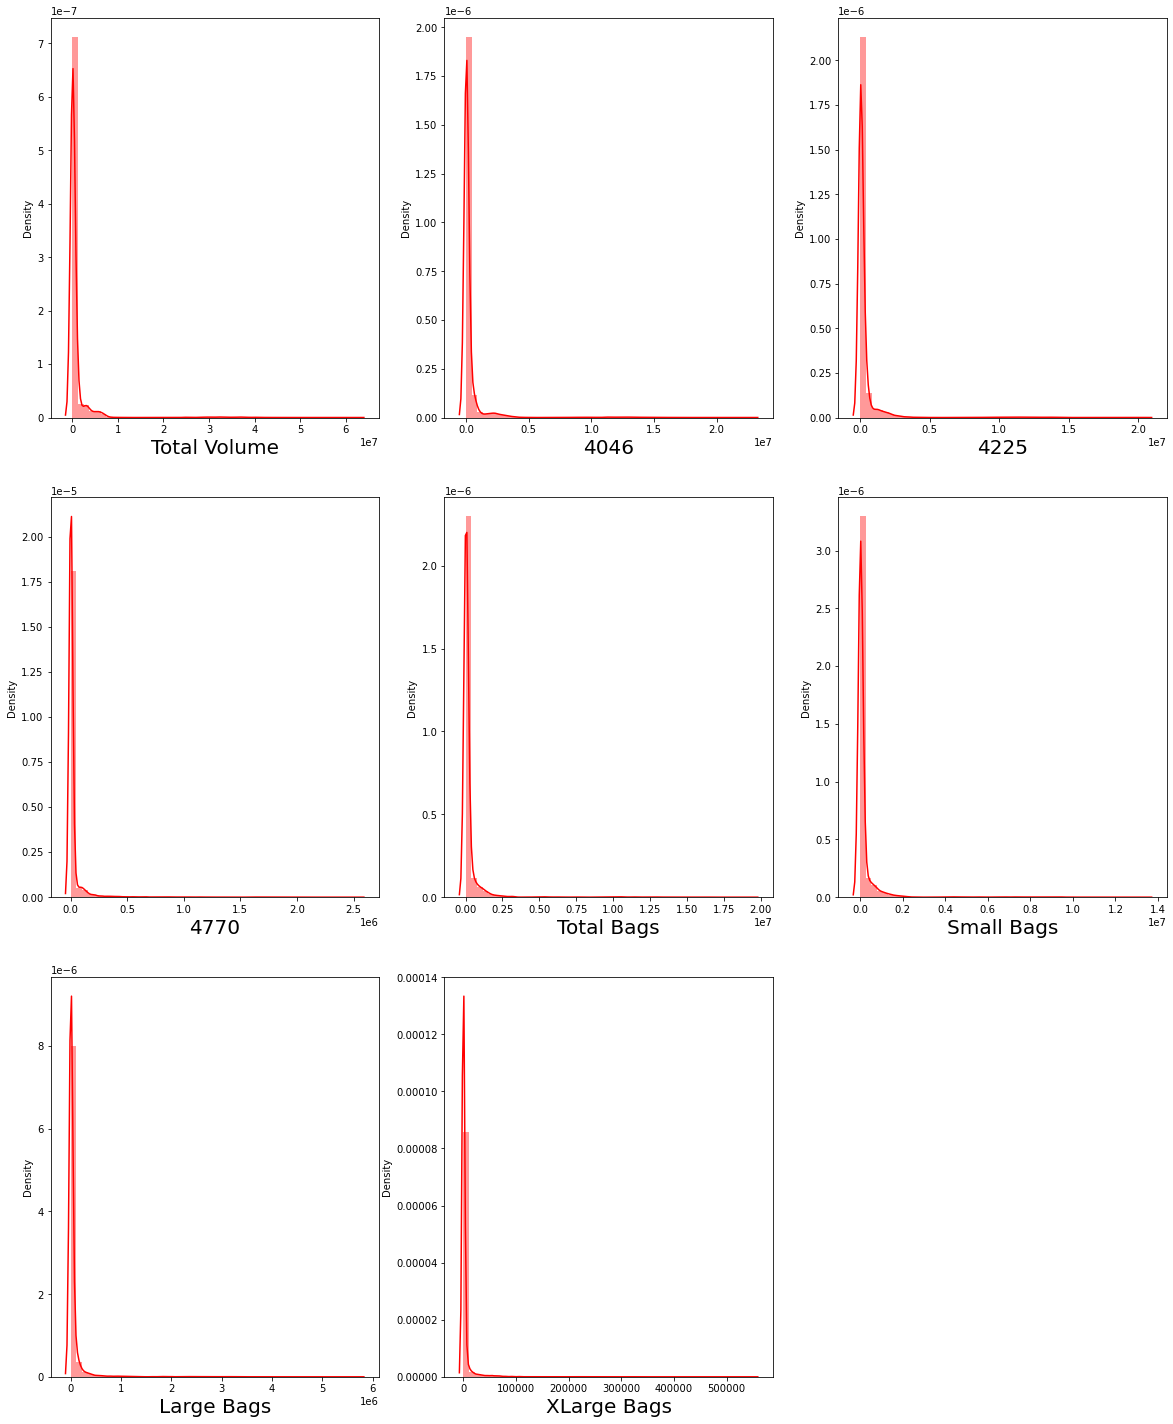

In [268]:
# let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [269]:
df.skew().sort_values()

Day             -0.001609
Month            0.047551
year             0.215339
AveragePrice     0.580303
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

As we can see above there is skewness present in almost all the columns.

# Identifying the outliers

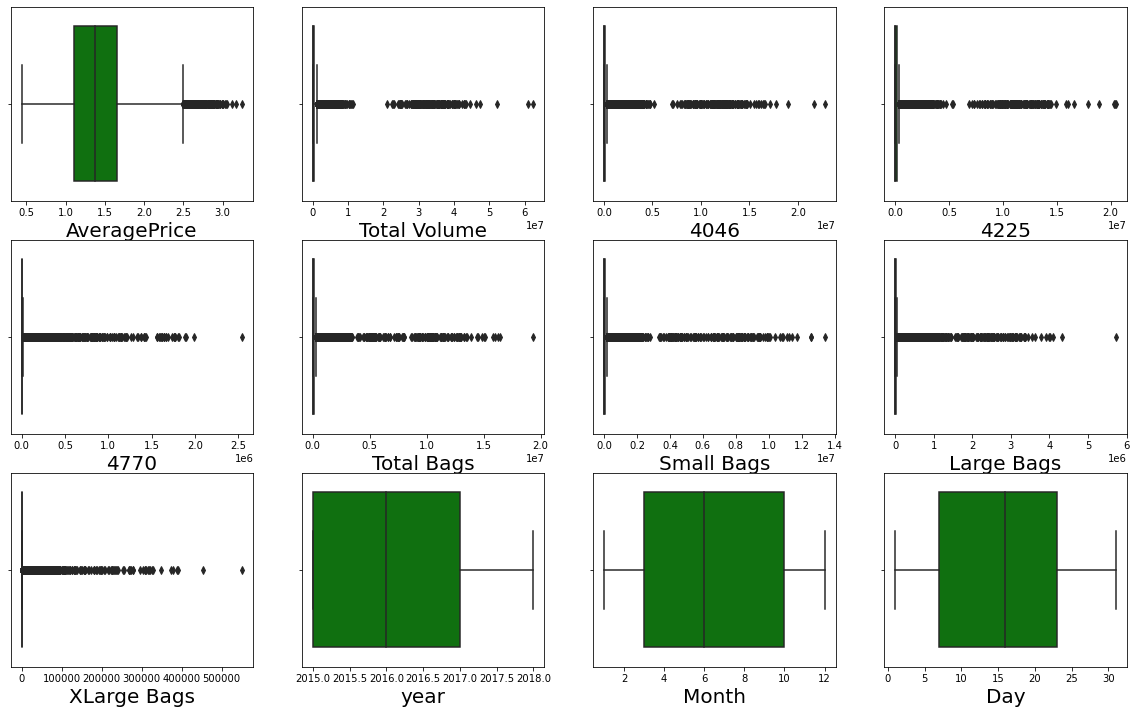

In [270]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, since it is our target variable I will keep it untouched.

# Data Preprocessing

# Dropping a column:

Since Day column has very less correlation with the target variable we will remove the Day column

In [271]:
df.drop('Day',axis=1,inplace=True)

In [272]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  
0                Albany     12  
1                Albany     12  
2                Albany     12  
3                Albany      6  
4                Albany     11  
...                 ...    ...  
18244  WestTexNewMexico      4  
18245  WestTexNewMexico      1  
18246  WestTexNewMexico      1  
18247  WestTexNewMexico      1  
18248  WestTexNewMexico      7  

[18249 rows x 13 columns]

# Removing outliers

# 1.Zscore method

In [273]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')

In [274]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [275]:
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

Now the outliers have been removed.

In [276]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  
0                Albany     12  
1                Albany     12  
2                Albany     12  
3                Albany      6  
4                Albany     11  
...                 ...    ...  
18244  WestTexNewMexico      4  
18245  WestTexNewMexico      1  
18246  WestTexNewMexico      1  
18247  WestTexNewMexico      1  
18248  WestTexNewMexico      7  

[17782 rows x 13 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [277]:
# Shape of original dataset
df.shape

(18249, 13)

Before removing the outliers we had 18249 rows and 14 columns in our dataset.

In [278]:
# Shape of new dataframe
new_df.shape

(17782, 13)

After removing the outliers we have 17782 rows and 14 columns.

# Percentage data loss:

In [281]:
loss_percent=(18249-17782)/18249*100
print(loss_percent,'%')

2.55904433119623 %


I am losing only 2.5% of data, so removing outliers.

Let's remove the outliers and check data loss using IQR method.

# 2)IQR method.

In [282]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [283]:
df1.shape

(11747, 13)

Using IQR method the dataframe has 11747 rows and 14 columns.

In [284]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss

35.62934955340019

Using IQR method I am losing more data. So let's consider Zscore method only.

# Checking for skewness

In [285]:
# Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
dtype: float64

All the columns have skewness except year, Month and Day. AveragePrice is our label so no need to remove skewness in this column.

# Removing skewness using yeo-johnson method

In [286]:
# Removing skewness using yeo-johnson method
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


scaler = PowerTransformer(method='yeo-johnson')

In [287]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [288]:
new_df.skew().sort_values()

Large Bags     -0.110061
4225           -0.043246
4046           -0.038259
Small Bags     -0.024657
Total Bags     -0.021531
Total Volume   -0.006809
4770            0.028015
Month           0.042069
year            0.220792
AveragePrice    0.560969
XLarge Bags     0.860603
dtype: float64

After using yeo-johnson method the skewness is still present in XLarge Bags, Let's remove skewness using log transformation.

In [289]:
# Removing skewness again using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

The skewness has been removed, now let's check it.

In [291]:
# Let's check the skewness again
new_df.skew().sort_values()

Large Bags     -0.110061
4225           -0.043246
4046           -0.038259
Small Bags     -0.024657
Total Bags     -0.021531
Total Volume   -0.006809
4770            0.028015
Month           0.042069
year            0.220792
AveragePrice    0.560969
XLarge Bags     0.791499
dtype: float64

I have removed the skewness.

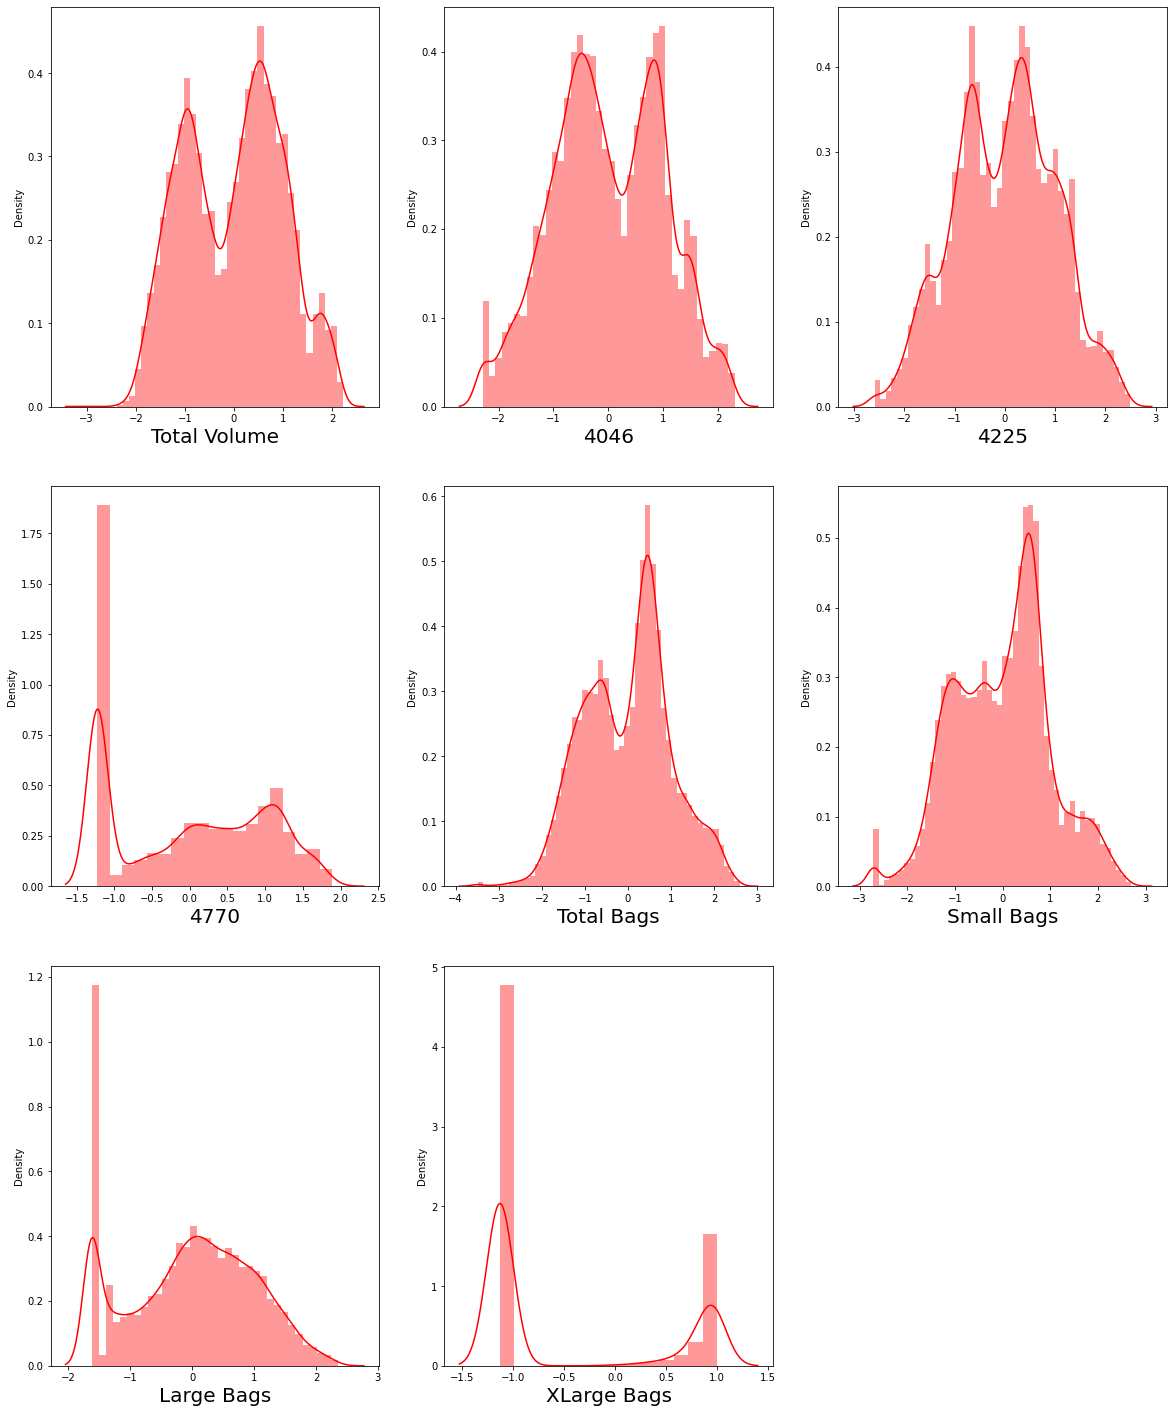

In [292]:
# let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal compare to previous data and the skewness is also removed.

# Encoding the categorical columns using Label Encoding

In [293]:
categorical_col = ["type","region"]

In [294]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [295]:
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

I have encoded the data using label encoding.

# Correlation between the target variable and independent variables using HEAT map

In [296]:
# Checking the correlation between features and the target
new_df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392262      0.629752  0.575152  0.583293  0.617192   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.071568     -0.015294 -0.014000 -0.019092 -0.012151   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392262  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.629752 -0.800828   
4046            0.799354    0.778765    0.601899     0.575152 -0.725826   
4225            0.818511    0.784901    0.614878     0.583293 -0.747722   
4770            0.761641    0.754305    0.548457     0.617192 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.612530 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.601404 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.451796 -0.500026   
XLarge Bags     0.612530    0.601404    0.451796     1.000000 -0.672461   
type           -0.725686   -0.720466   -0.500026    -0.672461  1.000000   
year            0.210924    0.185955    0.190295     0.156202  0.007399   
region          0.065996    0.051985    0.086573    -0.017598  0.021970   
Month          -0.004350   -0.002533   -0.004320     0.015762 -0.003290   

                  year    region     Month  
AveragePrice  0.099910  0.010428  0.071568  
Total Volume  0.076584  0.065709 -0.015294  
4046         -0.002396  0.159390 -0.014000  
4225         -0.004533  0.032273 -0.019092  
4770         -0.051657  0.037805 -0.012151  
Total Bags    0.210924  0.065996 -0.004350  
Small Bags    0.185955  0.051985 -0.002533  
Large Bags    0.190295  0.086573 -0.004320  
XLarge Bags   0.156202 -0.017598  0.015762  
type          0.007399  0.021970 -0.003290  
year          1.000000 -0.003610 -0.098248  
region       -0.003610  1.000000  0.001784  
Month        -0.098248  0.001784  1.000000

This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month')])

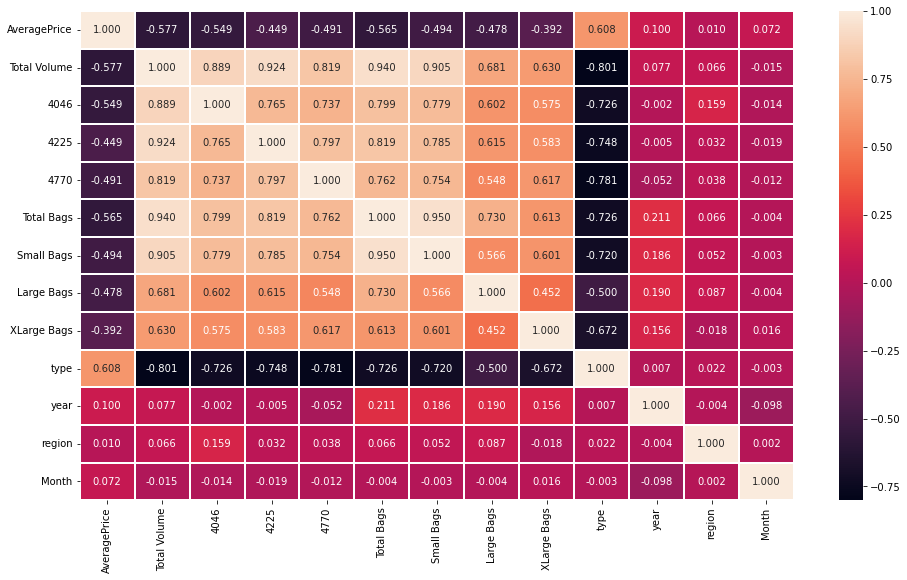

In [297]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [298]:
new_df.corr().AveragePrice.sort_values()

Total Volume   -0.576829
Total Bags     -0.564616
4046           -0.548618
Small Bags     -0.493621
4770           -0.491320
Large Bags     -0.477879
4225           -0.448579
XLarge Bags    -0.392262
region          0.010428
Month           0.071568
year            0.099910
type            0.608447
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

We can notice the positive and negative correlated features with label.

# Visualizing the correlation between label and features using bar plot

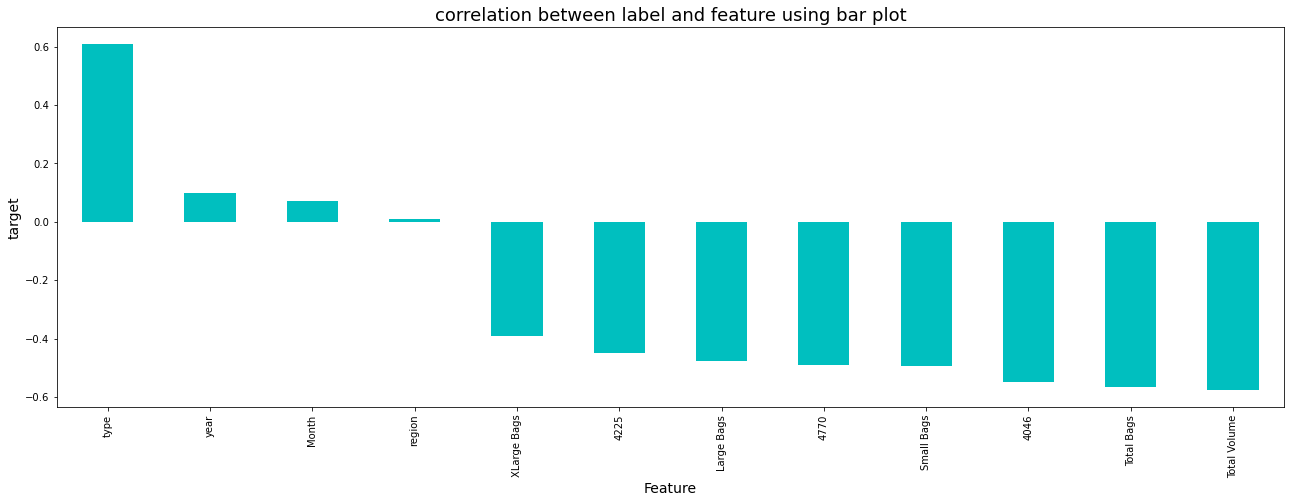

In [299]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

The features region and Day have very less correlation with the target so we can drop these columns.

# Separating the features and label variables into x and y

In [300]:
x = new_df.drop("AveragePrice",axis=1)
y = new_df["AveragePrice"]

In [301]:
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
18244     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
18245     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
18246     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
18247     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
18248     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags  type  year  region  Month  
0       -0.775214    -1.126094     0  2015       0     12  
1       -0.765237    -1.126094     0  2015       0     12  
2       -0.752534    -1.126094     0  2015       0     12  
3       -0.693012    -1.126094     0  2015       0      6  
4       -0.600755    -1.126094     0  2015       0     11  
...           ...          ...   ...   ...     ...    ...  
18244   -0.405895    -1.126094     1  2018      53      4  
18245   -0.478556    -1.126094     1  2018      53      1  
18246   -0.945246    -1.126094     1  2018      53      1  
18247   -0.910471    -1.126094     1  2018      53      1  
18248   -1.042930    -1.126094     1  2018      53      7  

[17782 rows x 12 columns]

In [302]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [303]:
x.shape

(17782, 12)

In [304]:
y.shape

(17782,)

In [305]:
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  type  year  region  Month  
0   -0.775214    -1.126094     0  2015       0     12  
1   -0.765237    -1.126094     0  2015       0     12  
2   -0.752534    -1.126094     0  2015       0     12  
3   -0.693012    -1.126094     0  2015       0      6  
4   -0.600755    -1.126094     0  2015       0     11

This is the dataframe containing only features.

# Standard Scalarization

In [306]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year    region     Month  
0       -0.775214    -0.685946 -1.026443 -1.214908 -1.698613  1.592359  
1       -0.765237    -0.685946 -1.026443 -1.214908 -1.698613  1.592359  
2       -0.752534    -0.685946 -1.026443 -1.214908 -1.698613  1.592359  
3       -0.693012    -0.685946 -1.026443 -1.214908 -1.698613 -0.108942  
4       -0.600755    -0.685946 -1.026443 -1.214908 -1.698613  1.308809  
...           ...          ...       ...       ...       ...       ...  
17777   -0.405895    -0.685946  0.974238  1.979143  1.742552 -0.676043  
17778   -0.478556    -0.685946  0.974238  1.979143  1.742552 -1.526694  
17779   -0.945246    -0.685946  0.974238  1.979143  1.742552 -1.526694  
17780   -0.910471    -0.685946  0.974238  1.979143  1.742552 -1.526694  
17781   -1.042930    -0.685946  0.974238  1.979143  1.742552  0.174608  

[17782 rows x 12 columns]

I have scaled my data now. Since we have multicollinearity problem, so let's use VIF factor to find it out.

# Checking VIF values to solve multicollinearity

In [307]:

# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [308]:
calc_vif(x)

Features  VIF values
0   Total Volume   52.065732
1           4046    7.151639
2           4225   11.169612
3           4770    3.944256
4     Total Bags   34.469011
5     Small Bags   16.630782
6     Large Bags    3.462776
7    XLarge Bags    2.064862
8           type    3.756275
9           year    1.344755
10        region    1.085262
11         Month    1.019733

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [309]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [310]:
# Againing checking the VIF after removing one column
calc_vif(x)

Features  VIF values
0          4046    3.730271
1          4225    4.279224
2          4770    3.930541
3    Total Bags   24.472165
4    Small Bags   16.630346
5    Large Bags    3.420378
6   XLarge Bags    2.051277
7          type    3.540470
8          year    1.342973
9        region    1.078426
10        Month    1.019023

The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [311]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [312]:
# Checking VIF again
calc_vif(x)

Features  VIF values
0         4046    3.712107
1         4225    4.135370
2         4770    3.930229
3   Small Bags    4.084425
4   Large Bags    1.864020
5  XLarge Bags    2.051080
6         type    3.537201
7         year    1.319632
8       region    1.078418
9        Month    1.018741

The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

In [313]:
# DataFrame after preprocessing and data cleaning
x.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.649918  0.358278 -0.212550   -0.337064   -0.775214    -0.685946   
1 -0.770067  0.276355 -0.165117   -0.301038   -0.765237    -0.685946   
2 -0.724508  0.656010  0.034215   -0.364044   -0.752534    -0.685946   
3 -0.625017  0.475615 -0.110976   -0.500341   -0.693012    -0.685946   
4 -0.677083  0.268966 -0.100289   -0.479918   -0.600755    -0.685946   

       type      year    region     Month  
0 -1.026443 -1.214908 -1.698613  1.592359  
1 -1.026443 -1.214908 -1.698613  1.592359  
2 -1.026443 -1.214908 -1.698613  1.592359  
3 -1.026443 -1.214908 -1.698613 -0.108942  
4 -1.026443 -1.214908 -1.698613  1.308809

Now we have resolved the multicollinearity problem. We have done with the preprocessing here. Now let's move to model selection.

# Modeling

# Finding best random state

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [315]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7632119178958424  on Random_state  144


In [316]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred_train = mod.predict(x_train)
    pred_test = mod.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.8400670366525624
At random state 1, the testing accuracy is :  0.7541295958728701


At random state 2, the training accuracy is : 0.8435423229414327
At random state 2, the testing accuracy is :  0.7324784518238749


At random state 3, the training accuracy is : 0.839927976887644
At random state 3, the testing accuracy is :  0.769547675021767


At random state 4, the training accuracy is : 0.8442717032138835
At random state 4, the testing accuracy is :  0.742441132427377


At random state 5, the training accuracy is : 0.843537629397062
At random state 5, the testing accuracy is :  0.7387979902294243


At random state 6, the training accuracy is : 0.8396853320899677
At random state 6, the testing accuracy is :  0.7609682723160036


At random state 7, the training accuracy is : 0.8432467281213903
At random state 7, the testing accuracy is :  0.7538802948840992


At random state 8, the training accuracy is : 0.8413839775814139
At random state

using both the methods we can see that the r2 score is maximum at 76.32% on Random_state 144. Also the training and testing acccuracy is closest at 194 random state.

# Creating new train test split

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=144)

I am creating new test train split

In [318]:
mod = KNN()

In [319]:
mod.fit(x_train,y_train)

KNeighborsRegressor()

In [320]:
pred_test = mod.predict(x_test)

In [321]:
print(r2_score(y_test,pred_test))

0.7628585590247619


We will draw the regression plot to see the best fit line

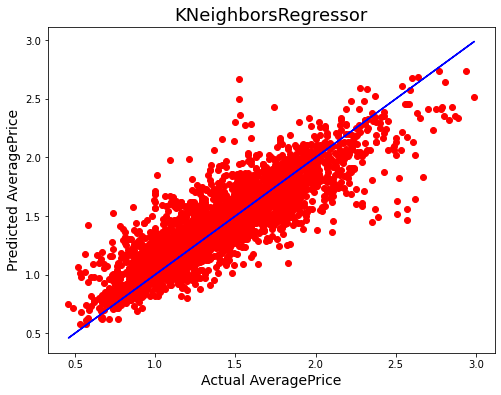

In [322]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual AveragePrice', fontsize=14)
plt.ylabel('Predicted AveragePrice', fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

The best fit line seems to be covering most of the data points

In [323]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [340]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=144)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Linear Regression

In [341]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 0.28629789920577786
R2 Score is: 47.225595504030046
Cross Validation Score is: 6.560557600846126
R2 Score - Cross Validation Score is 40.66503790318392


# L1 -- Lasso Regression

In [342]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.28628838695339315
R2 Score is: 47.22910230667774
Cross Validation Score is: 6.630012805369575
R2 Score - Cross Validation Score is 40.599089501308164


# L2 -- Ridge Regression

In [343]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.2862978983415548
R2 Score is: 47.225595822641246
Cross Validation Score is: 6.560559811062223
R2 Score - Cross Validation Score is 40.66503601157902


# Elastic Net

In [344]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.2862749747021037
R2 Score is: 47.23404669138675
Cross Validation Score is: 6.625811405747176
R2 Score - Cross Validation Score is 40.60823528563957


# Support Vector Regression

In [358]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.20609991594997404
R2 Score is: 72.6509246204785
Cross Validation Score is: -0.033309523756535064
R2 Score - Cross Validation Score is 72.68423414423503


In [359]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 0.24671125655755524
R2 Score is: 60.81093071249926
Cross Validation Score is: -9.242201476773618
R2 Score - Cross Validation Score is 70.05313218927287


In [360]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 0.286845456899729
R2 Score is: 47.02353558849491
Cross Validation Score is: 4.488332283056999
R2 Score - Cross Validation Score is 42.53520330543791


# Decision Tree Regressor

In [346]:
model=DecisionTreeRegressor(random_state=144)
regressor(model, x, y)

Root Mean Square Error is: 0.22325486028273842
R2 Score is: 67.90858524113652
Cross Validation Score is: -36.398224216558
R2 Score - Cross Validation Score is 104.30680945769453


In [347]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.2244391379050436
R2 Score is: 67.5672180220412
Cross Validation Score is: -32.99496508081315
R2 Score - Cross Validation Score is 100.56218310285436


# Random Forest Regressor

In [348]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.1570376657525149
R2 Score is: 84.12204081414106
Cross Validation Score is: 31.16070649124179
R2 Score - Cross Validation Score is 52.96133432289927


# K Neighbors Regressor

In [349]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.19191557334583964
R2 Score is: 76.28585590247619
Cross Validation Score is: 10.886648175313844
R2 Score - Cross Validation Score is 65.39920772716235


# SGD Regressor

In [351]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.286615415076393
R2 Score is: 47.10847272409321
Cross Validation Score is: 7.174639837754748
R2 Score - Cross Validation Score is 39.933832886338465


# Gradient Boosting Regressor

In [352]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.22183091095420623
R2 Score is: 68.31664640579712
Cross Validation Score is: 34.43079783356397
R2 Score - Cross Validation Score is 33.885848572233144


# Ada Boost Regressor

In [353]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=144)
regressor(model, x, y)

Root Mean Square Error is: 0.2961708482066496
R2 Score is: 43.52299768789347
Cross Validation Score is: -5.4020510158708674
R2 Score - Cross Validation Score is 48.92504870376434


In [354]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.2925821223584277
R2 Score is: 44.88337823492245
Cross Validation Score is: -13.105105267217454
R2 Score - Cross Validation Score is 57.98848350213991


# Extra Trees Regressor

In [355]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 0.15196437091671708
R2 Score is: 85.1313830880049
Cross Validation Score is: 34.648627094246834
R2 Score - Cross Validation Score is 50.48275599375806


In [356]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.1451205687788955
R2 Score is: 86.44045981033844
Cross Validation Score is: 35.28279728216092
R2 Score - Cross Validation Score is 51.15766252817752


In [357]:
model=ExtraTreesRegressor(random_state=144)
regressor(model, x, y)

Root Mean Square Error is: 0.146838505506784
R2 Score is: 86.11752403354915
Cross Validation Score is: 35.47839199815506
R2 Score - Cross Validation Score is 50.639132035394084


Comparing all the above the Extra Trees Regressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models.

# Hyperparameter Tuning

#ExtraTreesRegressor?

In [109]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ExtraTreesRegressor().get_params().keys()

In [110]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15],
              'random_state' : [194]}

In [111]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [112]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [113]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

This gives the best parameter value.

In [ ]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'auto', n_jobs = 10, random_state = 194)

In [ ]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [ ]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [ ]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

In [ ]:
final_cv_score = (cross_val_score(final_model, x, y, cv=8).mean())*100
print("Cross Validation Score is:", final_cv_score)

In [ ]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.

After tuning the R2 score of the model is increasing and is giving 88% which is good.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual AveragePrice', fontsize=14)
plt.ylabel('Predicted AveragePrice', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Plotting the Final model Actual AveragePrice vs Predicted AveragePrice

# Saving the model

In [116]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado,"Avocado.pkl")

['Avocado.pkl']

I have saved my model using .pkl.

# Predicting the saved model

In [117]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

array([0.9193629 , 1.14341698, 1.14770659, ..., 1.69566434, 2.28963131,
       1.1757595 ])

We can observe both original and predicted values are almost same.

In [ ]:
df_comparison.to_csv('Avacado_Project_AveragePrice_Prediction.csv')

# Classification Model Prediction by Region

In [ ]:
new_df.head()

In [ ]:
#assign the value of x and y for training and testing phase
X = new_df.drop(columns=['region'])
Y = new_df[["region"]]
print(X.shape)
print(Y.shape)

In [ ]:
X.columns

In [ ]:
plt.figure(figsize=(22,7))
new_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

We can see the correlation of all the features after using bar plot is positive with respect to region. We can also see year is negatively correlated.

# Standardizing the features

In [ ]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(X)
X = pd.DataFrame(X,columns=X.columns)

# VIF factor

In [ ]:
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Finding varience inflation factor in each scaled column
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(X)

We will drop "Total Volume" first

In [ ]:
X.drop("Total Volume",axis=1, inplace=True)

In [ ]:
calc_vif(X)

We will drop "Total Bags" next since the VIF is high

In [ ]:
X.drop("Total Bags",axis=1, inplace=True)

In [ ]:
calc_vif(X)

We will drop "year" next since the VIF is high

In [ ]:
X.drop("year",axis=1, inplace=True)

In [ ]:
calc_vif(X)

Since "year" is negatively correlated and also has high VIF Factor we will remove that column too. After which the VIF values are all under 10 which removes the multicollinearity problem.

In [ ]:
X

In [ ]:
Y

In [ ]:
X.shape

In [ ]:
Y.shape

# Machine Learning

# Finding Best Random State

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
LR = LogisticRegression()

In [ ]:
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=i)
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state       ', maxRS)

We have found best random_state value as 47. We will create our train_test_split using this random_state

In [ ]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=47)  # random_state 11 was the best random_state
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

# Logistic Regression

In [ ]:
model = LogisticRegression()
classifier(model, X, Y)

Cross Validation Score: 29.974327780295383

Accuracy Score - Cross Validation Score is 14.89494407801218

# Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
classifier(model, X, Y)

Cross Validation Score: 4.4540526403836855

Accuracy Score - Cross Validation Score is 3.1366136514352627

# SVC Classifier

In [ ]:
model = SVC(kernel='rbf')
classifier(model, X, Y)

Cross Validation Score: 29.265511406238687

Accuracy Score - Cross Validation Score is 16.390940660109358

In [ ]:
model = SVC(kernel='linear')
classifier(model, X, Y)

Cross Validation Score: 50.66889762198337

Accuracy Score - Cross Validation Score is 14.948195433962645

In [ ]:
model = SVC(kernel='poly')
classifier(model, X, Y)

Cross Validation Score: 26.391576298956444

Accuracy Score - Cross Validation Score is 14.204431572845635

# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
classifier(model, X, Y)

Cross Validation Score: 53.49758220059433

Accuracy Score - Cross Validation Score is 25.55780154975708

# KNeighbors Classifier

In [ ]:
model = KNeighborsClassifier()
classifier(model, X, Y)

Cross Validation Score: 37.38570122507529

Accuracy Score - Cross Validation Score is 28.59686835603238

# SGD Classifier

In [ ]:
model = SGDClassifier()
classifier(model, X, Y)

Cross Validation Score: 16.061557985600412

Accuracy Score - Cross Validation Score is 0.8347029084113942

# Random Forest Classifier

In [ ]:
model = RandomForestClassifier(random_state=47)
classifier(model, X, Y)

In [ ]:
Cross Validation Score: 67.28079709743902

Accuracy Score - Cross Validation Score is 22.654541671186237

# ExtraTrees Classifier

In [ ]:
model = ExtraTreesClassifier()
classifier(model, X, Y)

Cross Validation Score: 68.1129811683295

Accuracy Score - Cross Validation Score is 23.199922964366593